## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

__Example 13.2.3__ (Patients admitted in a hospital) The following data show the number of patients admitted in a hospital during intervals of one-hour over a period of five days (5 × 24 = 120 one-hour intervals).

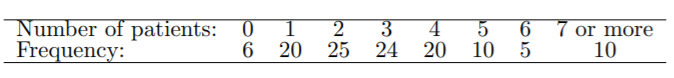

Test at the 5% level of significance that the data come from the Poisson distribution.

In [37]:
# Assign data
x = np.array([0, 1, 2, 3, 4, 5, 6 , 7])
f = np.array([6, 20, 25, 24, 20, 10, 5, 10])

# Estimate λ or sample mean
lambda_ = np.sum(f * x) / np.sum(f) 

# Calculate expected counts
expected = np.array([np.sum(f) * stats.poisson.pmf(k=i, mu=lambda_) for i in range(0, 7)])
expected = np.append(expected, np.sum(f) * (1 - stats.poisson.cdf(6, lambda_)))
expected

array([ 5.40590429, 16.75830329, 25.9753701 , 26.84121577, 20.80194222,
       12.89720418,  6.66355549,  4.65650466])

In [44]:
# chi.squared contributions
chi_squared = (f - expected)**2 / expected
# Test statistic
statistic = sum(chi_squared)
statistic

8.258618235171163

In [47]:
p_value = stats.chi2.sf(x=statistic, df=len(f) - 2)
p_value

0.21976197597119576

__Example 13.3.4__ An educator wants to learn whether a student’s academic achievement depends upon his/her field (sciences or arts) of interest. A random sample of 180 students was selected and classified according to their grades in certain science courses and arts courses. The results obtained are summarized in Table 13.1.

Test at the 5% level of significance the hypothesis that student grades are independent of their interest.

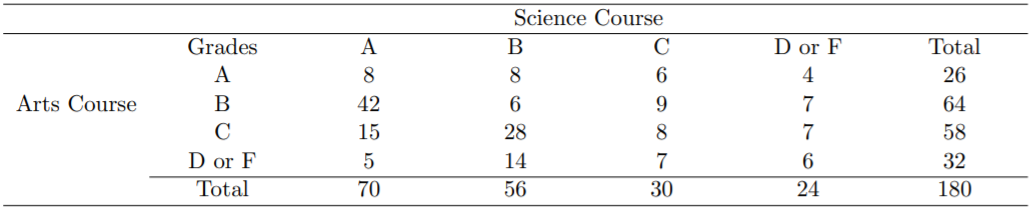

In [62]:
# building out a pandas dataframe

grades = ['A', 'B', 'C', 'D or F']
A = [8, 42, 15, 5]
B = [8, 6, 28, 14]
C = [6, 9, 8, 7]
D_or_F = [4, 7, 7, 6]

science_courses_df = pd.DataFrame({'Grades': grades, 'A': A, 'B': B, 'C': C, 'D or F': D_or_F})
# adding a "Total" column
science_courses_df['Total'] = science_courses_df.loc[:, ['A', 'B', 'C', 'D or F']].sum(axis=1)
science_courses_df

,Grades,A,B,C,D or F,Total
0,A,8,8,6,4,26
1,B,42,6,9,7,64
2,C,15,28,8,7,58
3,D or F,5,14,7,6,32


In [71]:
totals = [sum(A), sum(B), sum(C), sum(D_or_F)]
totals

[70, 56, 30, 24]

In [78]:
stats.chi2_contingency([A, B, C, D_or_F])

(38.885778822470634,
 1.2079889804658035e-05,
 9,
 array([[10.11111111, 24.88888889, 22.55555556, 12.44444444],
        [ 8.08888889, 19.91111111, 18.04444444,  9.95555556],
        [ 4.33333333, 10.66666667,  9.66666667,  5.33333333],
        [ 3.46666667,  8.53333333,  7.73333333,  4.26666667]]))